In [1]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI
from minimax_agent import MinimaxAgent
from expectimax_agent import ExpectimaxAgent

In [2]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()
minimax_agent1 = MinimaxAgent(player=1, depth=3)
minimax_agent2 = MinimaxAgent(player=2, depth=3)
expectimax_agent1 = ExpectimaxAgent(player=1, depth=3)
expectimax_agent2 = ExpectimaxAgent(player=2, depth=3)


Input Agents

In [3]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [4]:
#play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

Minimax agent vs UONI (Universal Optimization Neural Interface)

In [5]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:14<00:00,  1.39it/s]


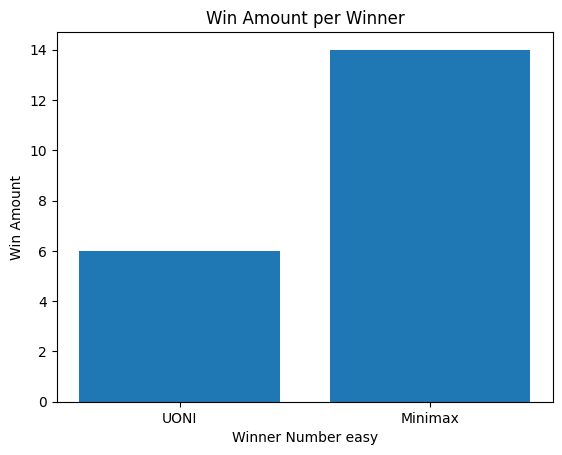

100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


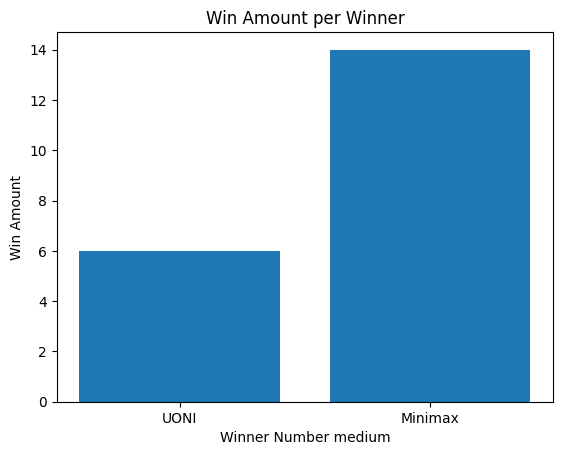

100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


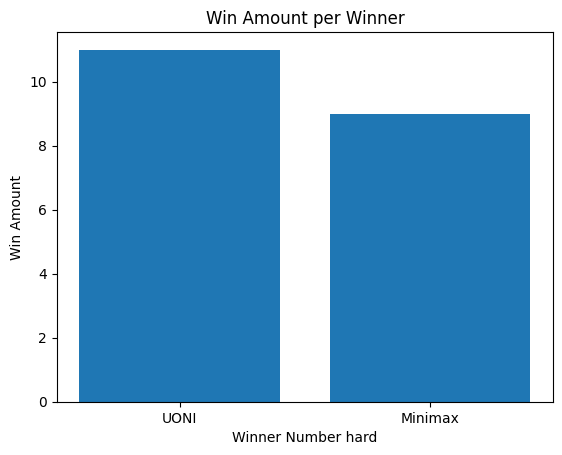

In [6]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2= minimax_agent2, render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1= minimax_agent1, agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

Expectimax agent vs UONI (Universal Optimization Neural Interface)

In [7]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "Expectimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [03:33<00:00, 10.67s/it]


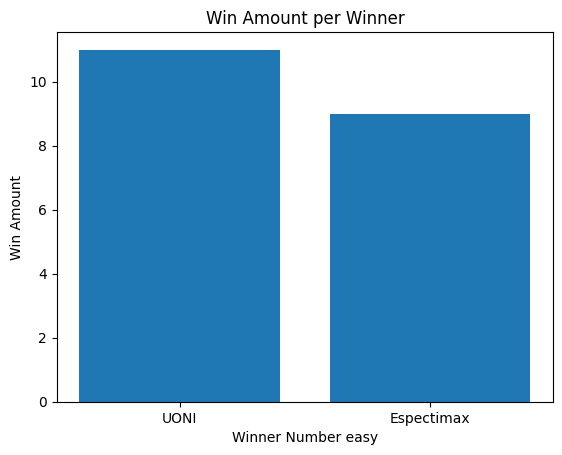

100%|██████████| 20/20 [05:11<00:00, 15.55s/it]


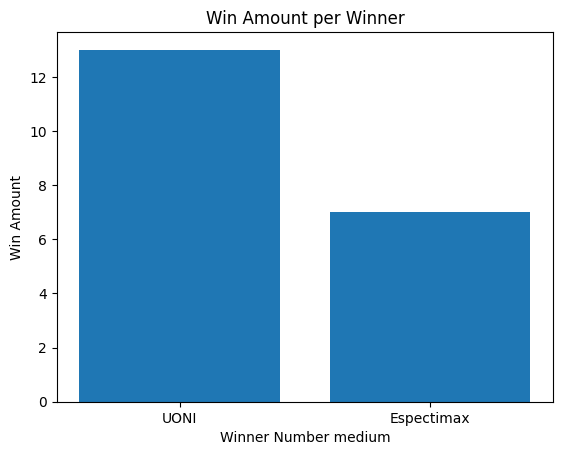

100%|██████████| 20/20 [02:08<00:00,  6.41s/it]


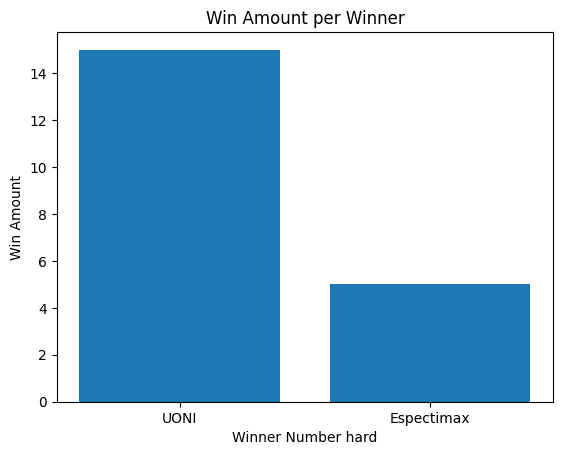

In [8]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2= expectimax_agent2, render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1= expectimax_agent1, agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)